## Metodo di Discesa del Gradiente
Il metodo discusso alla fine dell'introduzione quando svolto con metodo di punto fisso e $\phi(x) = 1$, rappresenta un'esempio di una più generica categoria di metodi noti come **metodi di ricerca in linea**.

Questi algoritmi si basano sulle condizioni del primo ordine per calcolare soluzioni al problema di ottimizzazione svincolato

$$
\min_{x \in \mathbb{R}^n} f(x),
$$

dove la funzione obiettivo $f(x)$ è derivabile almeno una volta.

L'idea di questo metodo è quello di calcolare il punto di minimo $x^*$ di $f(x)$ attraverso un procedimento iterativo. In particolare, scelto un termine $x_0 \in \mathbb{R}^n$, si considera l'iterazione:

$$
x_{k+1} = x_k + \alpha_k p_k,
$$

dove $\alpha_k > 0$ è detto **step-size** o **learning rate**, mentre $p_k \in \mathbb{R}^n$ è un vettore detto **direzione di discesa**, e viene scelto in modo tale da assicurare che $f(x_{k+1}) \leq f(x_k)$, ovvero che l'algoritmo si sta muovendo verso la direzione del minimo **per ogni** iterato $k \in \mathbb{N}$. 

In pratica, i metodi di linea definiscono una successione di punti $\{ x_k \}_{k \in \mathbb{N}}$ tali che, per ogni $k \in \mathbb{N}$, $x_{k+1}$ **riduce** il valore della funzione $f(x)$, affinché se si definisce:

$$
x^* = \lim_{k \to \infty} x_k,
$$

allora $\nabla f(x^*) = 0$, ovvero il punto limite è un punto stazionario. Inoltre, se la direzione di discesa $p_k$ e il passo $\alpha_k$ sono scelti correttamente, allora $x^*$ sarà necessariamente o un punto di minimo o un punto di sella.

```{nota}
In generale, se $f(x)$ non è convessa, non è possibile determinare a priori se il punto di convergenza di tale procedimento sia un punto di minimo globale o locale, ma solamente che $x^*$ è un punto stazionario.
```

## Metodo di discesa del gradiente (GD)
Diamo una definizione:

> $p_k$ è una **direzione di discesa** se esiste $\alpha_k > 0$ tale che $f(x_k + \alpha_k p_k) \leq f(x_k)$.

Quindi, una direzione di discesa è una direzione lungo la quale è sempre possibile procedere ad una diminuzione della funzione obiettivo, con uno step size adeguato.

Chiaramente, questa definizione è poco operativa, e non è chiaro come sia possibile trovare una direzione di discesa per $f(x)$. Un risultato più operativo è il seguente:

**Teorema:** Un vettore $p_k \in \mathbb{R}^n$ è una direzione di discesca per $f(x)$ in $x_k$ se:

$$
p_k^T \nabla f(x_k) \leq 0.
$$

La disequazione sopra ha una soluzione semplice. Infatti, se scegliamo $p_k = - \nabla f(x_k)$, allora:

$$
p_k^T \nabla f(x_k) = - (\nabla f(x_k))^T \nabla f(x_k) = - || \nabla f(x_k) ||_2^2 \leq 0.
$$

Quindi, scegliendo come direzione di discesa la direzione dell'antigradiente, si ottiene un metodo di ricerca di linea per l'ottimizzazione della funzione $f(x)$ (il più semplice possibile), definito da:

$$
\begin{cases}
x_0 \in \mathbb{R}^n, \\
x_{k+1} = x_k - \alpha_k \nabla f(x_k).
\end{cases}
$$

Questo metodo prende il nome di **metodo di ripida discesa** o, più genericamente, **metodo di discesa del gradiente**.

Un'osservazione chiave sul metodo di più ripida discesa. Si osservi che la direzione di discesa dell'antigradiente ha una semplice interpretazione grafica: ricordiamo che in generale, il gradiente $\nabla f(x)$ di una qualunque funzione $f(x)$, rappresenta il vettore che, applicato ad $x$, punta nella direzione di massima crescita $f(x)$. Di conseguenza, ha intuitivamente senso che il vettore a lui opposto punti verso una direzione verso cui $f(x)$ decresce. Per questo motivo il metodo è spesso chiamato, come detto, metodo di ripida discesa. 

```{warning}
Il fatto che la scelta $p_k = - \nabla f(x_k)$ sia una direzione di discesa **NON** implica necessariamente che il valore funzione $f(x)$ calcolata in $x_k - \alpha_k \nabla f(x_k)$ sia più piccolo del valore di $f(x_k)$ (ovvero, non implica che $f(x_{k+1}) \leq f(x_k)$) per ogni scelta di $\alpha_k > 0$. Andiamo nel seguito ad osservare, sperimentalmente, come la scelta della direzione del passo $\alpha_k$ influenza il metodo.
```

### Metodo di Discesa del Gradiente in Python

Consideriamo per esempio la funzione già introdotta $f(x) = (x-1)^2 + e^x$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x-1) ** 2 + np.exp(x)

Oltre alla funzione $f(x)$, necessitiamo per l'implementazione del metodo di discesa del gradiente anche della sua derivata $f'(x)$. Attraverso dei semplici calcoli, si nota che:

$$
f'(x) = 2(x-1) + e^x.
$$

Andiamo ad implementare questa funzione in Python.

```{warning}
Come già detto, **NON** si utilizzano software di differenziazione automatica per svolgere questi esercizi (che sono poco efficienti). Si calcola invece la derivata di $f(x)$ *a mano*, e la si implementa come una funzione Python. 
```

In [2]:
def df(x):
    return 2*(x-1) + np.exp(x)

Passiamo quindi ad implementare la funzione di Discesa del Gradiente, nella sua forma *base*. Andremo poi ad aggiungerci funzionalità in seguito.

In particolare, considereremo un algoritmo che prende in input:
* una funzione `f`;
* la sua derivata `df`;
* un valore iniziale `x0`;
* un valore di learning rate `alpha` (che lo consideriamo costante);
* un numero `maxit` di iterazioni;

> Il metodo della discesa del gradiente con la scelta fatta di selezionare un valore fisso e costante del learning rate $\alpha$, uguale per tutte le iterazioni del metodo, prende il nome di **metodo di discesa del gradiente a passo fisso**.

In [3]:
def GD(f, df, x0, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return x

Verifichiamone il funzionamento sulla funzione implementata sopra, che come già osservato soluzione esatta $x^* \approx 0.31492$. 

In [4]:
# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
alpha = 1e-2
maxit = 100

# Calcoliamo la soluzione
x_sol = GD(f, df, x0, alpha, maxit)
print(f"Soluzione calcolata: {x_sol:0.4f}")

# A scopo di analisi di prestazioni, misuriamo l'errore rispetto al minimo (noto)
x_true = 0.31492
rel_err = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
print(f"Errore Relativo della soluzione calcolata: {rel_err:0.5f}.")

Soluzione calcolata: 0.3040
Errore Relativo della soluzione calcolata: 0.03453.


> **Esercizio:** Valutare l'impatto del punto iniziale `x0`, dello step-size `alpha` e del numero di iterazioni `maxit` sulla soluzione.

Come avrete senz'altro notato, il numero di iterazioni influenza tantissimo l'errore ottenuto dall'algoritmo. Andiamo quindi a modificare l'algoritmo sopra per includere una misura dell'errore relativo tra la soluzione computata $x_k$ al passo $k$-esimo e la soluzione esatta $x_{true}$ ad ogni step, oltre che il valore della funzione obiettivo $f(x_k)$ e la norma del gradiente $|| \nabla f(x_k) ||_2^2$, in modo da poterlo visualizzare.

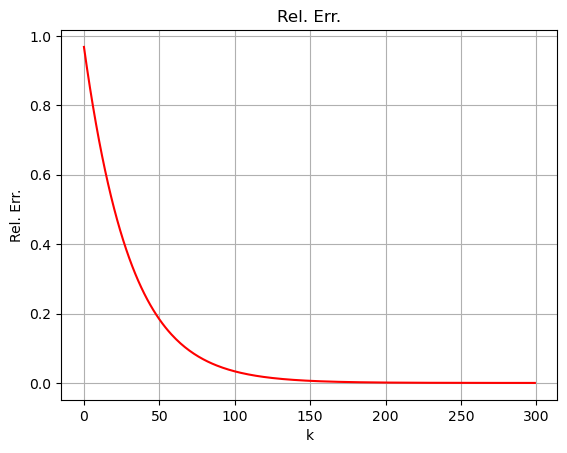

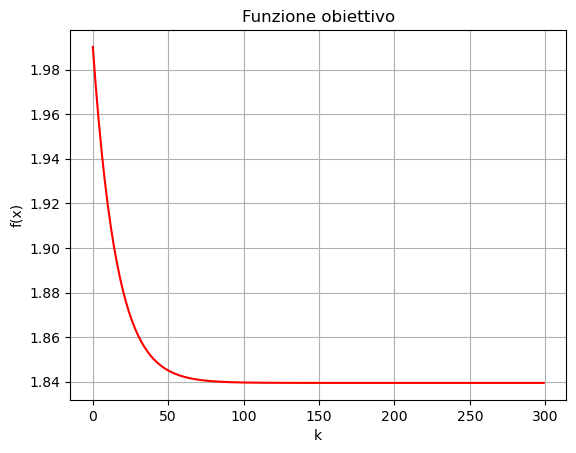

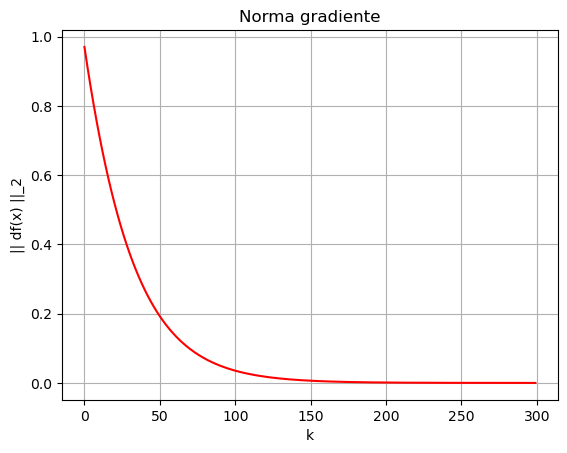

In [5]:
def GD(f, df, x0, x_true, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit, ))
    obj_val = np.zeros((maxit, ))
    grad_norm = np.zeros((maxit, ))

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1e-2
maxit = 300

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit)

# Visualizziamo le metriche
plt.plot(np.arange(maxit), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

## Criteri di Arresto
Dal grafico dell'errore appena misurato, si osserva come l'errore nella soluzione l'errore decresce dapprima molto velocemente, per poi stabilizzarsi e smettere, praticamente, di scendere. Questo comportamento evidenzia la necessità di definire un metodo **automatico** per determinare quando l'algoritmo deve essere terminato, poiché in generale non è necessario raggiungere il numero di iterazioni `maxit` selezionato. La selezione di tecniche utilizzate per determinare in maniera automatica quando l'algoritmo deve essere interrotto prende il nome di **criteri d'arresto**. Tali criteri si basano sia su alcune proprietà matematiche del modello, che su alcune osservazioni sulle possibili casistiche che possono occorrere. Vediamo nel seguito quali sono i più utilizzati.

Le condizioni necessarie e sufficienti di ottimalità suggeriscono che un semplice metodo per determinare se un tale valore $x_k$ sia o meno in prossimità di un minimo è controllare il valore di $|| \nabla f(x_k) ||_2$. Infatti, se $x_k$ fosse esattamente uguale ad un punto di minimo, allora sarebbe un punto stazionario (per via delle condizioni necessarie del primo ordine), e quindi varrebbe che $|| \nabla f(x_k) ||_2 = 0$. Di conseguenza, possiamo immaginarci che tanto più $|| \nabla f(x_k) ||$ è piccola, tanto più $x_k$ sarà vicino ad un punto di minimo. Questa osservazione ci porta al primo dei criteri di arresto: selezionata una tolleranza `tolf` (il cui valore dipende dall'applicazione, ma è solitamente selezionato valere attorno a $10^{-6}$), si interrompe l'algoritmo quando:

$$
|| \nabla f(x_k) ||_2 \leq tolf.
$$

Ma questa condizione non è sufficiente. Infatti, **se la funzione $f(x)$ è molto piatta**, è possibile che $|| \nabla f(x_k) ||_2$ sia piccola, ma $x_k$ sia lontano dal punto di minimo. Per questo motivo, si è soliti inserire un'ulteriore condizione, definita scegliendo un parametro `tolx` (in genere attorno a $10^{-6}$), e fermando l'algoritmo quando:

$$
|| x_{k+1} - x_k ||_2 \leq tolx.
$$

Quando succede, fermiamo l'algoritmo iterativo e ritorniamo un messaggio di errore che dice che non si è raggiunto il punto di minimo perché la funzione obiettivo era troppo piatta.

Vediamo come modificare la funzione `GD` sopra per integrare queste funzionalità.

Algoritmo terminato in 407 iterazioni.


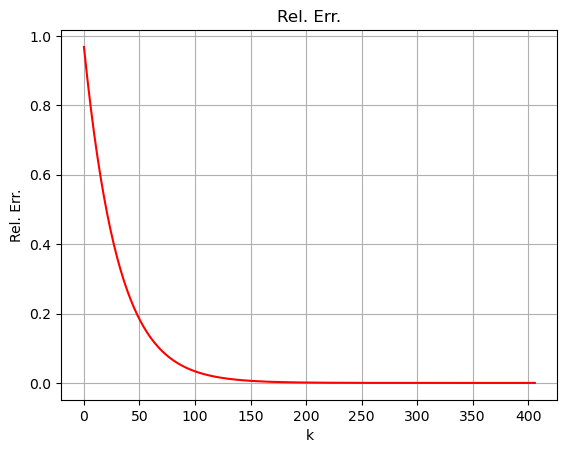

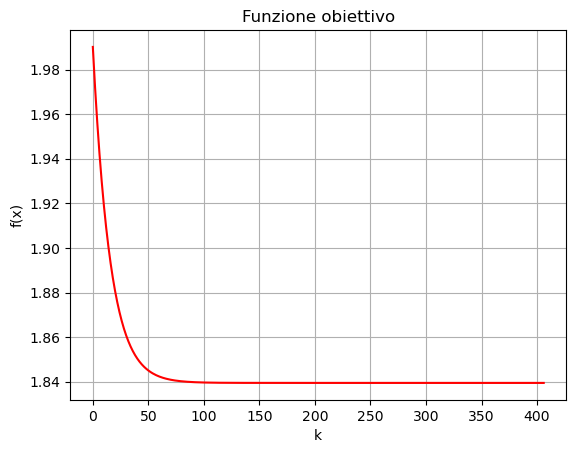

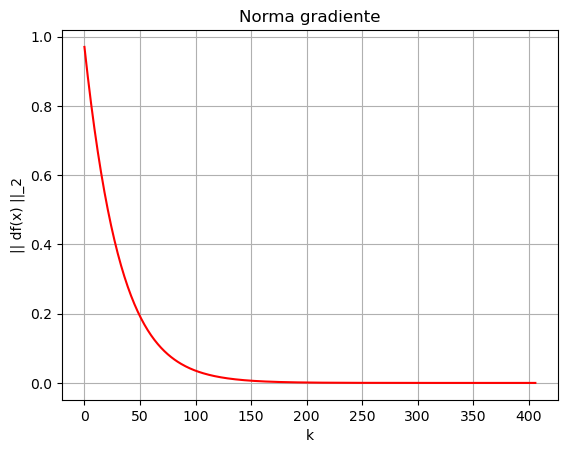

In [6]:
def GD(f, df, x0, x_true, alpha, maxit=100, tolf=1e-6, tolx=1e-6):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    tolf (float): tolleranza di || grad(f) ||_2
    tolx (float): tolleranza di || x_{k+1} - x_k ||_2
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit+1, ))
    obj_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Ciclo iterativo (uso un ciclo while)
    condizione = True
    while condizione:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Check condizioni di arresto
        condizione = (k < maxit) and (np.linalg.norm(df(x)) > tolf) and (np.linalg.norm(x - x0) > tolx)

        # Se l'algoritmo termina per || x_{k+1} - x_k || < tolx, stampare il warning
        if (np.linalg.norm(x - x0) < tolx):
            print(f"Algoritmo terminato per condizione su tolx.")
            
        # Preparazione per step successivo
        k = k + 1
        x0 = x

    # Se l'algoritmo si ferma prima di maxit, tagliare i valori inutilizzati delle metriche
    if k < maxit:
        rel_err = rel_err[:k]
        obj_val = obj_val[:k]
        grad_norm = grad_norm[:k]

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1e-2
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

## Scelta del passo
Cosa succede se il valore del passo fisso $\alpha$ viene scelto troppo grande? Proviamo a lanciare l'algoritmo sopra con $\alpha = 1$.


Algoritmo terminato in 9 iterazioni.


/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_34383/3632210909.py:5: RuntimeWarning: overflow encountered in exp
  return (x-1) ** 2 + np.exp(x)
/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_34383/2071672784.py:2: RuntimeWarning: overflow encountered in exp
  return 2*(x-1) + np.exp(x)
/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_34383/2347787700.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  x = x0 - alpha * df(x0)


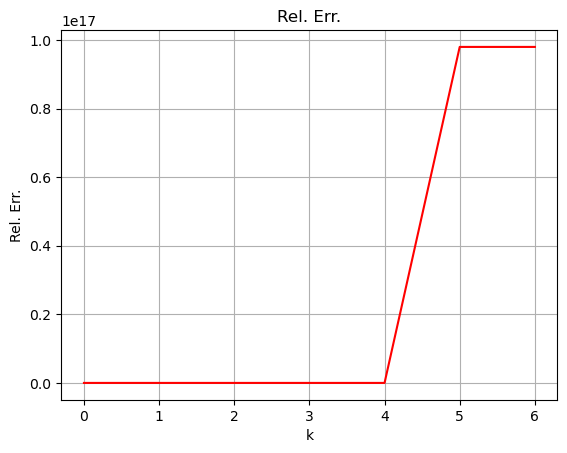

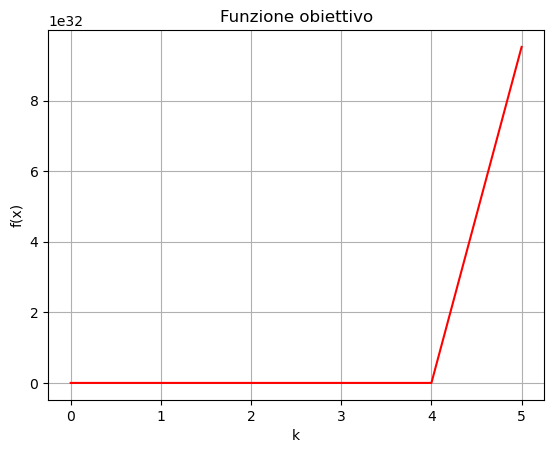

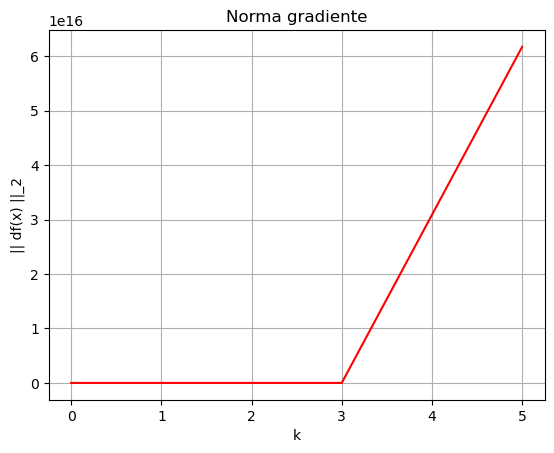

In [7]:
# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

Come si vede, l'errore cresce rapidamente e per raggiungere, in appena 6 iterazioni, dei valori dell'ordine di $10^{17}$: l'algoritmo **non converge**. Questo comportamento origina dalla scelta troppo grande del learning rate.

Infatti, possono verificarsi tre possibili condizioni dipendentemente dalla scelta di $\alpha$:

![](../imgs/step_size.png)

Se il passo è troppo piccolo, gli iterati calcolati dall'algoritmo sono tutti troppo vicini, e non riescono mai a raggiungere il punto di minimo. Se il passo è troppo grande, gli iterati rimbalzano da una parte all'altra della funzione, possibilmente crescendo fino all'infinito (è il caso dell'esempio visto precedentemente).

Uno step importante nello sviluppo dell'algoritmo di Discesa del Gradiente è quindi quello di scegliere accuratamente il valore del parametro $\alpha$. Dal punto di vista teorico, questo problema è risolto tramite il seguente risultato:

**Teorema:** Il metodo di Discesa del Gradiente con direzione $p_k = - \nabla f(x_k)$ converge ad un punto stazionario di $f(x)$ se per ogni $k \in \mathbb{N}$, $\alpha_k$ soddisfa le seguenti condizioni, note come **condizioni di Wolfe**:

$$
\begin{cases}
    f(x_k - \alpha_k \nabla f(x_k)) \leq f(x_k) - c_1 \alpha_k || \nabla f(x_k) ||_2^2 \\
    \nabla f(x_k)^T \nabla f(x_k - \alpha_k \nabla f(x_k)) \leq c_2 || \nabla f(x_k) ||_2^2
\end{cases}
$$

dove $0 < c_1 < c_2 < 1$ sono due costanti. La prima condizione, nota come **condizione di Armijo**, richiede che $f(x_{k+1})$ comporti una decrescita sufficientemente di $f(x_k)$. Infatti, siccome $c_1 \alpha_k || \nabla f(x_k) ||_2^2 > 0$, chiaramente la condizione di Armijo implica che $f(x_{k+1}) \leq f(x_k) - c_1 \alpha_k || \nabla f(x_k) ||_2^2 < f(x_k)$.

### Algoritmo di backtracing
Ma come fare ad assicurarsi che le condizione di Wolfe vengano rispettate? Per farlo, esiste un algoritmo semplice ma estremamente efficace chiamato **algoritmo di backtracing**, il cui funzionamento è il seguente:

* Si inizializza $\alpha_k$ con una stima di partenza (in genere, $\alpha_k = 1$);
* Si controlla se $\alpha_k$ soddisfa la condizione di Armijo;
* Se si, allora l'algoritmo termina. Altrimenti, si riduce il valore di $\alpha_k$ e si ripete dallo step precedente.

Un'implementazione dell'algoritmo di backtracing è la seguente:

In [8]:
def backtracking(f, df, x, alpha=1, rho=0.5, c=1e-4):
    """
    Algoritmo di backtracking per Discesa Gradiente.

    Parameters:
    f       : Funzione obiettivo.
    df      : Gradiente della funzione obiettivo.
    x       : Iterato x_k.
    alpha   : Stima iniziale di alpha(default 1).
    rho     : Fattore di riduzione (default 0.5).
    c       : Costante delle condizioni di Armijo (default 1e-4).

    Returns:
    alpha   : Learning rate calcolato con backtracking.
    """
    while f(x - alpha * df(x)) > f(x) - c * alpha * np.linalg.norm(df(x))**2:
        alpha *= rho
    return alpha

E' possibile dimostrare che, se $\alpha_k$ viene scelto tramite algoritmo di backtracking, allora necessariamente soddisferà le condizioni di Wolfe, e l'algoritmo di Discesa del Gradiente convergerà.

```{warning}
L'algoritmo di backtracing **NON** seleziona il valore migliore possibile del parametro $\alpha_k$. Non assicura, cioè, che la funzione raggiungerà il minimo nel minor numero possibile di step. 
```

Vediamo come utilizzare l'algoritmo di backtracking per trovare la soluzione di minimo al problema definito sopra.

Algoritmo terminato in 37 iterazioni.


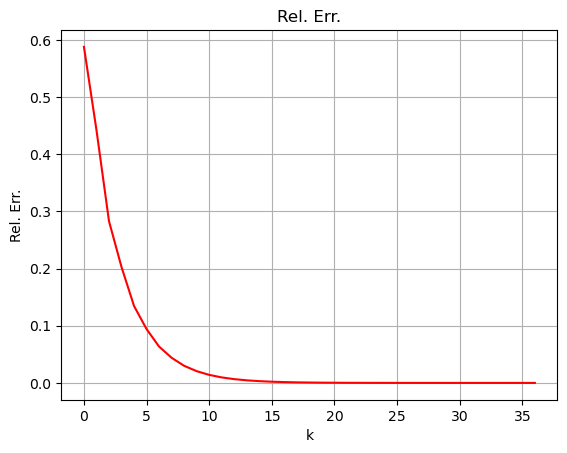

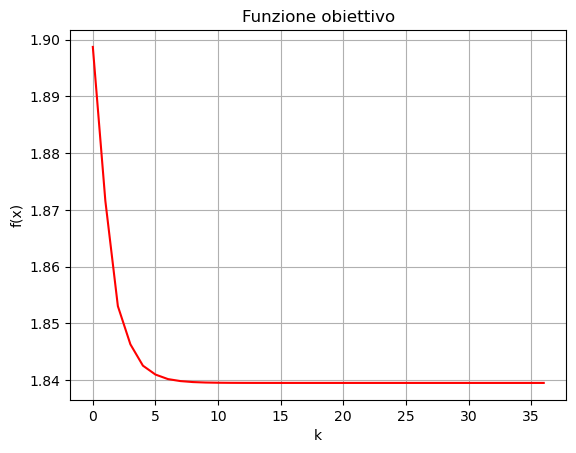

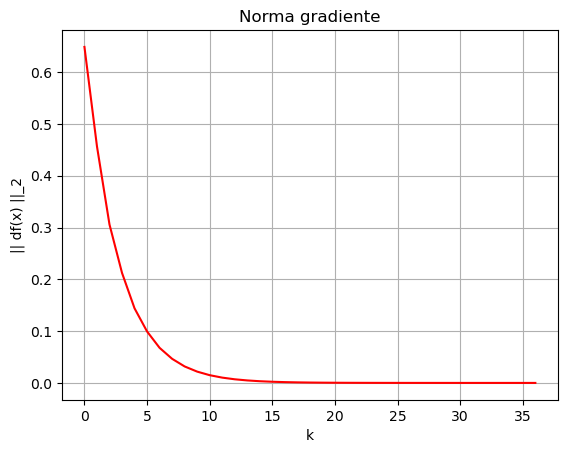

In [9]:
def GD_backtracking(f, df, x0, x_true, maxit=100, tolf=1e-6, tolx=1e-6):
    r"""
    Implementa il metodo di discesa del gradiente con passo scelto con backtracking applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    maxit (int): numero di iterazioni
    tolf (float): tolleranza di || grad(f) ||_2
    tolx (float): tolleranza di || x_{k+1} - x_k ||_2
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit+1, ))
    obj_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Ciclo iterativo (uso un ciclo while)
    condizione = True
    while condizione:
        # Scelta di alpha_k con backtracking
        alpha = backtracking(f, df, x0, alpha=1)

        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Check condizioni di arresto
        condizione = (k < maxit) and (np.linalg.norm(df(x)) > tolf) and (np.linalg.norm(x - x0) > tolx)

        # Se l'algoritmo termina per || x_{k+1} - x_k || < tolx, stampare il warning
        if (np.linalg.norm(x - x0) < tolx):
            print(f"Algoritmo terminato per condizione su tolx.")
            
        # Preparazione per step successivo
        k = k + 1
        x0 = x

    # Se l'algoritmo si ferma prima di maxit, tagliare i valori inutilizzati delle metriche
    if k < maxit:
        rel_err = rel_err[:k]
        obj_val = obj_val[:k]
        grad_norm = grad_norm[:k]

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD_backtracking(f, df, x0, x_true, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

Da notare come il metodo di backtracking ha un costo. Infatti, per trovare il valore del learning rate tale da soddisfare le condizioni di Armijo, è a volte necessario eseguire varie volte il ciclo che definisce l'algoritmo, che richiede a sua volta di calcolare il valore di un possibile $x_{k+1}$ per ogni dato $\alpha_k$. Come risultato, può capitare che a livello di tempo di esecuzione, l'algoritmo con metodo di backtracking richieda molto più tempo a convergere di quanto sia necessario con scelta fissa del passo (il quale, però, non ha certezza di covergere!).

> **Esercizio:** Confrontare su uno stesso plot il risultato ottenuto con il metodo di backtracking e differenti valori di passo fisso $\alpha$. Commentare sul metodo migliore in questo caso. Confrontare anche il tempo richiesto da ciascun metodo a convergere.